# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df.loc[:, 'Number of Discharges'] = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [9]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16661,MARLBORO PARK HOSPITAL,420054,SC,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16818,STAMFORD MEMORIAL HOSPITAL,450306,TX,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16565,CITIZENS BAPTIST MEDICAL CENTER,10101,AL,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13762,P H S INDIAN HOSPITAL AT BROWNING - BLACKFEET,270074,MT,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13812,THE NEUROMEDICAL CENTER HOSPITAL,190266,LA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16553,KAISER FOUNDATION HOSPITAL - SOUTH SAN FRANCISCO,50070,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13845,DOCTORS HOSPITAL LLC,170194,KS,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16664,HERITAGE MEDICAL CENTER,440137,TN,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13876,ROSELAND COMMUNITY HOSPITAL,140068,IL,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


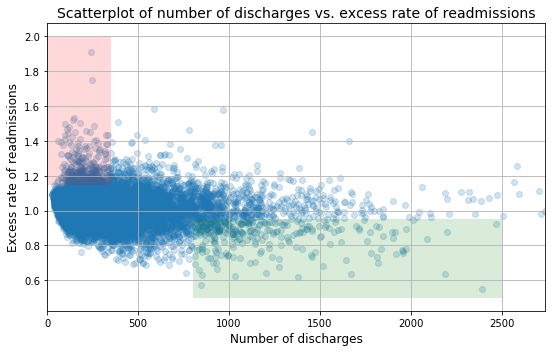

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [ ]:
# Your turn

## A:  Do you agree with the above analysis and recommendations? Why or why not?

Although the analysis is not entirely incorrect, I do not agree with its methodology or overall conclusions, and therefore do not agree with its recommendations for the following reasons:

1. The data is shown as a scatterplot. But the point of scatterplots is to show a positive or negative correlation between two variables. If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation. If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation. In this case, visually at least, there would seem to be no strong correlation, and the data is too densely plotted to estimate one. While it is plausible that there is a rough left-right downwards trend in the distribution of point, there is no obvious best-line-of fit and there are too many outliers to estimate a significant correlation of a linear regression with any quantifiable degree of confidence.

2. There's is no obvious clustering in the data, which might justify the division into two easily identifiable groups for the purpose of policy recommendation.
3. Merely pointing out that the results show us 63% and 44% of two fairly arbitrarily chosen groups have Excess Readmission does not really tell us very much. We really need to do a proper statistical comparison of these groups to properly establish and quantify the nature of the difference between them.


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

If we plot the Excess Readmission Ratio (ERR) data for the whole population of hospitals as a histogram (defined above as the list $ y $), we can see that it follows a normal distribution, which means that we can carry out an alternative analysis using the Central Limit Theorum to compare the two groups under discussion.

(array([   1.,    1.,    0.,    0.,    0.,    2.,    5.,    0.,    2.,
           3.,    5.,    9.,   11.,   13.,   18.,   18.,   27.,   26.,
          32.,   33.,   72.,   91.,   91.,  173.,  221.,  263.,  377.,
         435.,  534.,  652.,  726.,  790.,  816.,  785.,  794.,  713.,
         637.,  595.,  516.,  398.,  325.,  269.,  199.,  169.,  119.,
          99.,   76.,   59.,   47.,   43.,   33.,   41.,   14.,   14.,
          14.,    9.,   12.,   11.,    3.,    6.,    7.,    7.,    8.,
           2.,    4.,    1.,    5.,    2.,    2.,    1.,    2.,    1.,
           1.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.5495,  0.5631,  0.5767,  0.5903,  0.6039,  0.6175,  0.6311,
         0.6447,  0.6583,  0.6719,  0.6855,  0.6991,  0.7127,  0.7263,
         0.7399,  0.7535,  0.7671,  0.7807,  0.7943,  0.8079,  0.821

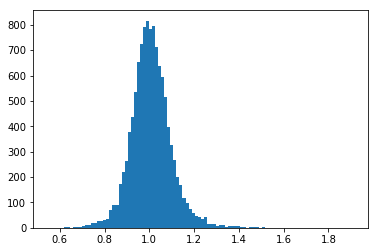

In [111]:
# Plot the list y of the Error Readmission 
# Ratios for all hospitals as a histogram

plt.hist(y, bins=100)

To compare our two groups that are themselves samples from this population, we test null hypothesis that there is no difference between the means of the two samples (under the CLT principle that the sample distribution of the sample means of a normal distribution itself follows a normal distribtion).

To start with, let's isolate the two samples under discussion - hospitals with discharge rates of less than 100 discharges every month (DPM) and hospitals with discharge rates of more than 1000 DPM - from our master dataframe and plot them as histograms so we can get a better sense of them.

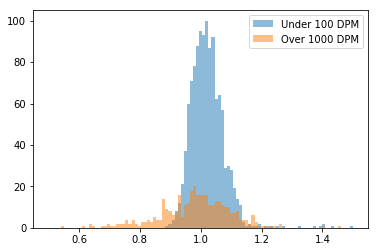

In [114]:
# Isolate the two sample groups that we want to compare
# and plot them as histograms

under100_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
under100_err = list(under100_df['Excess Readmission Ratio'][81:-3])
over1000_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
over1000_err = list(over1000_df['Excess Readmission Ratio'][81:-3])

bins = np.linspace(0.5, 1.5, 100)

plt.hist(under100_err, bins, alpha=0.5, label='Under 100 DPM')
plt.hist(over1000_err, bins, alpha=0.5, label='Over 1000 DPM')
plt.legend(loc='upper right')
plt.show()


We can see from this that the 100 DPM sample skews slightly to the right of 1, and the 1000 DPM sample (which has a smaller sample size) skews slightly to the left. The question is, whether or not this difference in skew is significant and if so, to what degree we can be confident about the size and nature of that difference.

We should begin by stripping out null values from the data, determining the sample sizes of our two samples, and replotting the result:

Sample size of Under 100 DPM:  1188
Sample size of Over 1000 DPM:  463 



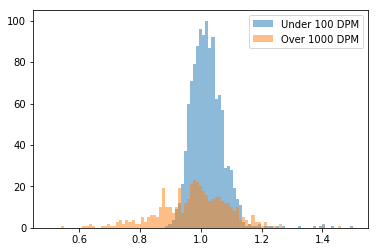

In [116]:
# Strip out NaNs from dataset

group1 = under100_df['Excess Readmission Ratio']
group2 = over1000_df['Excess Readmission Ratio']
group1 = group1.dropna()
group2 = group2.dropna()

print('Sample size of Under 100 DPM: ', len(group1))
print('Sample size of Over 1000 DPM: ', len(group2), '\n')

bins = np.linspace(0.5, 1.5, 100)

plt.hist(group1, bins, alpha=0.5, label='Under 100 DPM')
plt.hist(group2, bins, alpha=0.5, label='Over 1000 DPM')
plt.legend(loc='upper right')
plt.show()

Next, let's take a look at the means and standard deviations of the two groups, and the difference between them:

In [119]:
# Calculate means, standard deviations, difference

mean1, std1 = group1.mean(), group1.std()
print('\nUnder 100 DPM mean: ', mean1)
print('Under 100 DPM std: ', std1, '\n')

mean2, std2 = group2.mean(), group2.std()
print('Under 100 DPM mean: ', mean2)
print('Under 100 DPM std: ', std2, '\n')

difference_in_means = mean1 - mean2
print('Difference between the means: ', difference_in_means, '\n')


Under 100 DPM mean:  1.0226183501683508
Under 100 DPM std:  0.0579786032342628 

Under 100 DPM mean:  0.978335421166307
Under 100 DPM std:  0.12000735348224047 

Difference between the means:  0.04428292900204378 



What we're interested in here is using a confidence interval to express the degree to which we can be certain that there is or is not a significant difference between the outcomes for our two sample groups. 

To test this we're going to calculate the test statistic and use it to test the null hypothesis, $ H_0 $, that there is NO difference between the distribution of Excess Readmission Rates in hospitals with less than 100 monthly discharges and hospitals with more than 1000 monthly discharges, which is to say that the mean difference between the two populations is 0: 

$$ P_1 - P_2 = 0 $$

which would also entail that the mean of any sampling distribution of the proportion between these two groups should also equal 0:

$$ \bar P_1 - \bar P_2 = 0 $$ 

The alternate hypothesis is that there IS a difference, such that:

$$ P_1 - P_2 \neq 0 $$

We want to test this with a significance level, $ \alpha $, of < 1%. If we assume $ H_0 $, this means we want to figure out the probability of our sample occuring given that $ H_0 $ is true. This probability is known as the P-value:

$$ P (\bar P_1 - \bar P_2 \, | \, H_0) < 1\% ) $$
 
We can do this by using the computer to turn our samples into multiple hypothesised samples by resampling from it randomly to create two new samples, and looking at the differences in the means of these samples to get an idea of the probability of the occurance of our actual sample, if indeed it happened by pure chance.

As in previous exercises I'll adapt some code by Allan Downey. We begin by defining a function to quantify the size of the effect, which as pointed out above is called the "test statistic".


In [120]:
def TestStatistic(data):
    '''Calculate the test statistic'''
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

Now we can run the two groups we placed in pandas series earlier through our TestStatistic function:

In [121]:
actual = TestStatistic((group1, group2))
actual

0.04428292900204378

The actual difference in the means of the Excess Readmission Ratio is 0.044, or 4.4% (which is the same result we obtained earlier).

The null hypothesis is that there is no difference between the groups. We can model that by forming a pooled sample that includes both samples.

In [122]:
# Create a pooled sample

n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

Then we can simulate the null hypothesis by shuffling the pool and dividing it into two groups, using the same sizes as the actual sample.

In [123]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

The result of running the model is two NumPy arrays with the shuffled ERRs:

In [100]:
RunModel()

(array([ 0.9689,  1.0507,  1.0137, ...,  1.0622,  0.9491,  1.0353]),
 array([ 1.082 ,  1.0251,  1.0445,  0.9333,  0.9894,  0.9736,  0.9609,
         1.1016,  1.0825,  0.9861,  1.0951,  0.9667,  1.0419,  1.0993,
         1.1029,  0.9555,  0.9432,  1.0043,  0.9504,  1.0338,  1.0331,
         0.9873,  1.0349,  1.0327,  0.9815,  1.0721,  0.9351,  1.1762,
         1.1912,  0.9484,  0.9682,  0.8917,  1.1212,  0.8313,  0.9751,
         0.9603,  1.0526,  0.9916,  1.065 ,  1.0843,  0.9575,  1.0619,
         1.024 ,  1.0566,  1.0256,  1.0083,  0.9814,  1.0424,  1.0367,
         0.9468,  1.0647,  1.0419,  1.0091,  1.0879,  0.9831,  1.0914,
         1.0917,  0.6987,  0.9766,  0.9872,  1.0124,  0.9831,  1.0207,
         0.9985,  0.9024,  1.0169,  0.92  ,  0.9545,  1.0606,  1.0025,
         1.0109,  1.0225,  0.9971,  1.0115,  1.085 ,  0.9994,  0.9761,
         0.9951,  1.053 ,  0.7688,  1.0738,  0.9607,  0.9765,  1.1129,
         0.9763,  1.1208,  0.9877,  1.0704,  1.2348,  1.042 ,  1.0021,
        

Now we have this, we can compute the test statistic using the simulated data:

In [101]:
TestStatistic(RunModel())

0.00029440717469886302

If we now run the model 1000 times and compute the test statistic, we can see how much the test statistic varies under the null hypothesis.

In [124]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000,)

Here's the sampling distribution of the test statistic under the null hypothesis, with the actual difference in means indicated by a gray line.

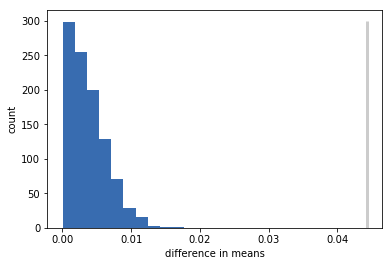

In [107]:
plt.vlines(actual, 0, 300, linewidth=3, color='0.8')
plt.hist(test_stats, color=COLOR5)
plt.xlabel('difference in means')
plt.ylabel('count')
None

The p-value is the probability that the test statistic under the null hypothesis exceeds the actual value, 0.044.

In [105]:
pvalue = sum(test_stats >= actual) / len(test_stats)
pvalue

0.0

#### 2. Compute and report the observed significance value (or p-value).

As we can see, the p-value is 0%. This is the probability that the actual difference between the two groups could be due to chance. This is below our standard alpha threshold of 1%, so we can reject the null hypothesis and be 99% confident that there is a significant difference of around 4.4% between the ERRs of hospitals with monthly discharge rates of under 100, and those with monthly discharge rates of over 1000.

#### 3. Report statistical significance for  $ \alpha $  = .01.

To calculate the confidence interval for that percentage, we can ask the interval $ d $ such that we can be 99% confident that the true difference between the sample groups will fall within $ d $ of 0.032 (or 3.2%)?

To find this interval we can use a $ z $ table. This is a two-tailed interval (i.e. it stretches out to both sides from the mean), so we want to find the 99.5% confidence value in a normal distribution, and apply it to both sides of our mean. Looking up 99.5% on the table gives us a $ z $ score of 2.58, so:

$$ d = 1.96 \, * \, \sigma(\bar p_1 - \bar p_2) $$

where $ \sigma(\bar p_1 - \bar p_2) $ is the standard deviation of the sample distribution of the sample proportion. To calculate *that* we calculate the variance of the two samples according to the CLT formula:

$$ \sigma_\bar p ^2 = \frac{P_x (1-P_x)}{N} $$

then subtract the result for $\bar p_2$ from the result for $\bar p_1 $ to give us the variance of the sampling distribution of the sample proportions, and then take the square root of that figure to give us the standard deviation. As our sample size is quite large, we can estimate the true population means $P_1$ and $P_2$ using our sample proportions (once of which we already calculate above when looking at the margin of error):

$$ \sigma(\bar p_1 - \bar p_2) \approx \sqrt (\frac{P_1 (1 - P_1)}{1118} + \frac{P_2 (1 - P_2)}{463}) $$

If we plug in the numbers, we get a result of 0.005, and so we can now calculate $ d $:

$$ d \, = \, 2.58 \, * \, 0.005 \, = \, 0.013 $$

So we have our answer: our 99% confidence interval is 0.013 + 0.013 = 0.026. So there's a 99% chance that the true proportional difference between the ERRs of the two groups of hospitals names is within 1.3% of 4.4%, which is to say that: 

$$ 3.1 \, \lt \, P \, \lt \, 5.7 $$

As zero lies outside this range, we can be 99% certain that the actual difference between the groups is not zero, and therefore we can reject the null hypothesis.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

So, while there is a statistically significant difference between the two groups we've been discussing, it is only in the region of 4-5%. In practical terms, this is not a very large difference, and I would not recommend the kind of sweeping (and hugely disruptive and expensive) changes recommended by the Preliminary Report based upon them. 

It would seem to make far more sense to look among smaller hospitals for outliers that could, with targeted spending, be quickly brought back towards the mean ERR for their group. We can see how easy these outliers are to identify by just looking at the uppermost points on the original scatterplot. Another way of doing this would be to group the results by state. Reallocating funds within state boundaries to improve practices at anomalous hospitals or, indeed, amalgamating smaller hospitals within larger in those outlying situations might solve the issues without the need for a wholesale federal reorganisation. 

Another option might be to examine the ERR rate by treatment type, which is broken out as "Measure Name" in the original dataframe. High correlations between ERR rate and particular treatments or departments might well provide a more granular way of allocating future resources.

#### 5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

I have answered these questions in the course of answering the previous questions, above.